---
**License**

 spatial_correlations

 Tue Aug 24 10:30:00 2021\
 Copyright  2021\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Mariana Penna-Lima <pennalima@gmail.com>

---
---

 spatial_correlations\
 Copyright (C) 2021 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Mariana Penna-Lima <pennalima@gmail.com>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
1  # NumCosmo

from numcosmo_py import Ncm, Nc

# CCL
import pyccl as ccl
from pyccl.halos.massdef import MassDef

import sys
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline
import random

In [2]:
__name__ = "NcContext"

Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

In [4]:
Omega_c = 0.262
Omega_b = 0.049
Omega_k = 0.0
H0 = 67.66
Tcmb0 = 2.7255
A_s = 2.1e-9
sigma8 = 0.8277
n_s = 0.96
Neff = 0.0
w0 = -1.0

cosmo = Nc.HICosmoDEXcdm()
cosmo.omega_x2omega_k()
cosmo.param_set_by_name("H0", H0)
cosmo.param_set_by_name("Omegac", Omega_c)
cosmo.param_set_by_name("Omegab", Omega_b)

reion = Nc.HIReionCamb.new()
prim = Nc.HIPrimPowerLaw.new()

prim.param_set_by_name("n_SA", 0.9658)
prim.param_set_by_name("ln10e10ASA", 3.0904)

reion.param_set_by_name("z_re", 7.0)

cosmo.add_submodel(reion)
cosmo.add_submodel(prim)

In [24]:
use_EH = False
use_nonlin = True

if use_EH:
    tf = Nc.TransferFunc.new_from_name("NcTransferFuncEH")
    psml = Nc.PowspecMLTransfer.new(tf)
else:
    psml = Nc.PowspecMLCBE.new()

if use_nonlin:
    zmaxnl = 10.0
    psmnl = Nc.PowspecMNLHaloFit.new(psml, zmaxnl, 1.0e-5)
    ps = psmnl
else:
    ps = psml


kmin = 1.0e-6
kmax = 1.0e3
#
# New linear matter power spectrum object based of the EH transfer function.
ps.require_kmin(kmin)
ps.require_kmax(kmax)

#
# Apply a tophat filter to the psml object, set best output interval.
ps_corr3d = Ncm.PowspecCorr3d.new(ps)
ps_corr3d.set_best_lnr0()

In [25]:
psml.prepare(cosmo)
ps_corr3d.prepare(cosmo)

<Figure size 640x480 with 0 Axes>

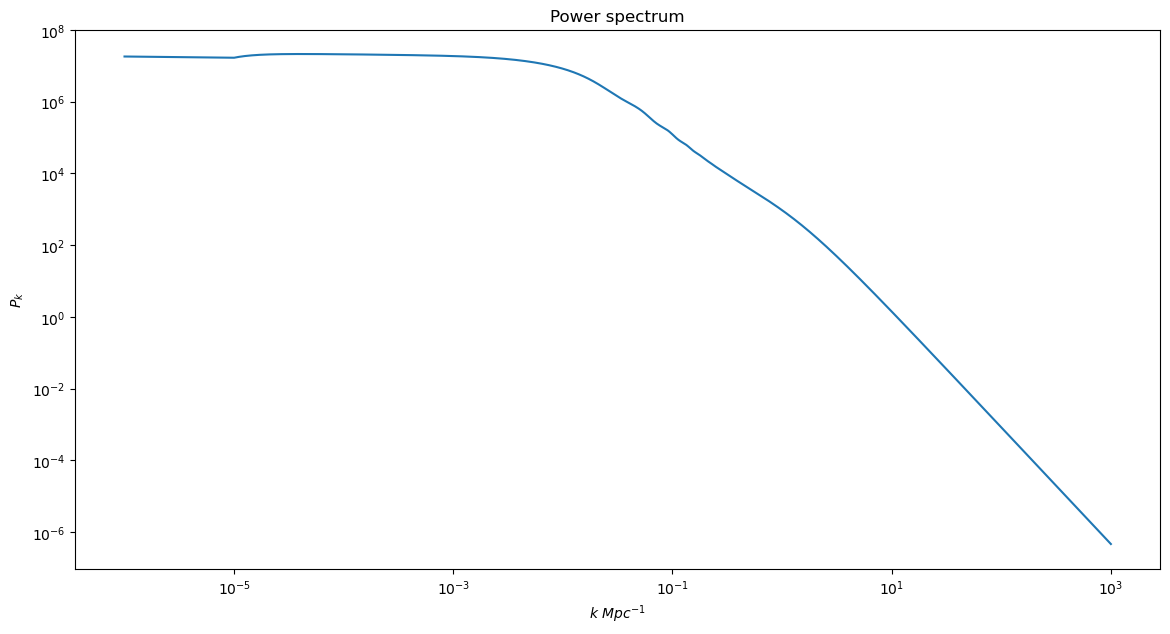

In [26]:
plt.figure()
fig, axs = plt.subplots(1, figsize=(14, 7))

k = np.geomspace (kmin, kmax, 1000)
Pk = [k_i**(-1) * ps.eval(cosmo, 0.0, k_i) for k_i in k]

axs.plot(k, Pk)

axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylabel(r"$P_k$")
axs.set_xlabel(r"$k$ $Mpc^{-1}$")

plt.title("Power spectrum")
plt.show()


<Figure size 640x480 with 0 Axes>

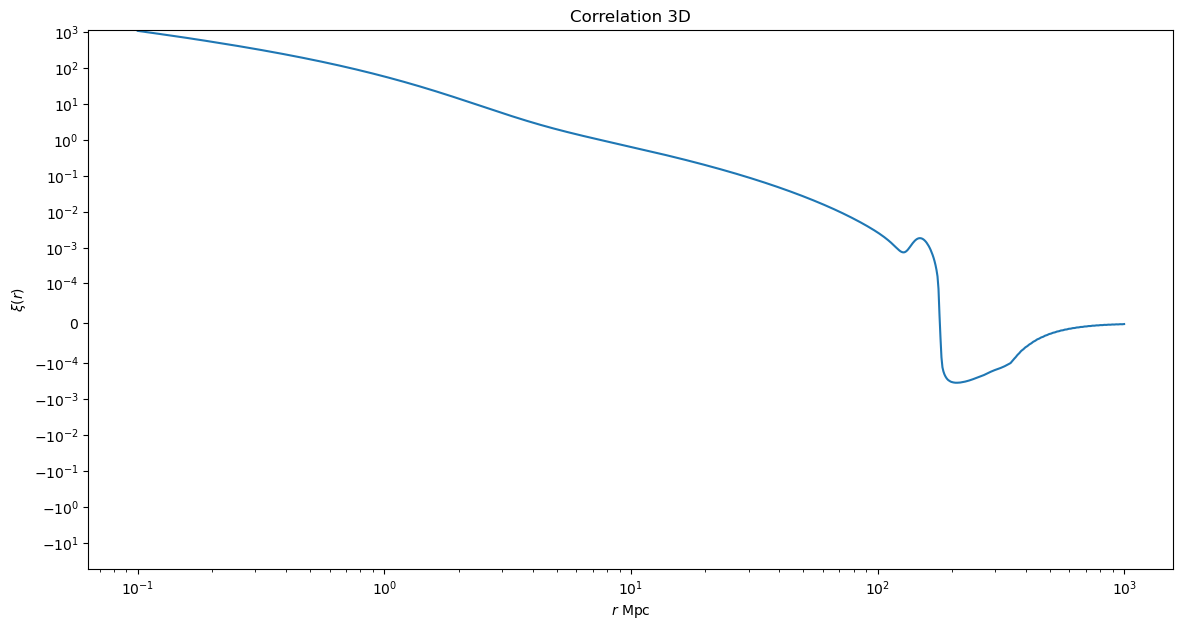

In [27]:
plt.figure()
fig, axs = plt.subplots(1, figsize=(14, 7))

# Plot settings

r = np.geomspace (1.0e-1, 1.0e3, 1000)
xi = [ps_corr3d.eval_xi(0.0, r_i) for r_i in r]

axs.plot(r, xi)

axs.set_xscale("log")
axs.set_yscale("symlog", linthresh=1.0e-4)
axs.set_ylabel(r"$\xi(r)$")
axs.set_xlabel(r"$r$ Mpc")

plt.title("Correlation 3D")
plt.show()